# Titanic Survival

타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성하기

https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

<b>Contents:</b>  
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File

## 1. Import Libraries

In [415]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # plot 스타일은 seaborn (default, ggplt, dark, classic 등 존재)
sns.set(font_scale=2.5)  # plot의 모든 폰트 사이즈 세팅
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import missingno as msno # 결측치 시각화 패키지

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- 탐색적 데이터 분석(exploratory data analysis) : 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

- feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

- model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

- 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

- 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

## 2. Data 확인

In [452]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [453]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [454]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


feature : Pclass, Age, SibSp, Parch, Fare  
예측하려는 target label : Survived

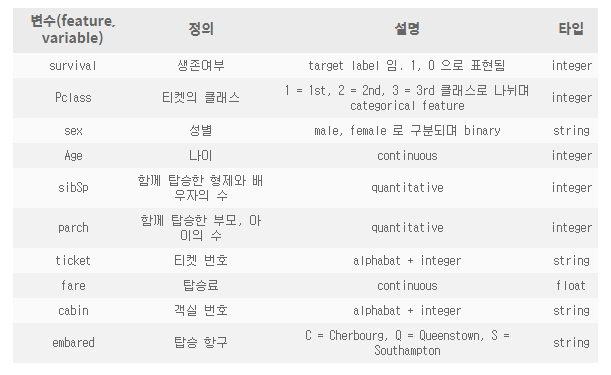

In [314]:
from IPython.display import Image 
Image("변수설명.PNG")

In [315]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lemore, Mrs. (Amelia Milley)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


training set 에서
1. 891명의 passengers
2. NaN 값 : Age(714/891), Cabin(204/891), Embarked(889.891)

## 2.1 Null data check

In [455]:
df_train.agg(lambda x: sum(x.isnull()) / x.shape[0])
# 지정된 축에서 하나 이상의 작업을 사용하여 집계

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [456]:
df_test.agg(lambda x: sum(x.isnull()) / x.shape[0])
# 지정된 축에서 하나 이상의 작업을 사용하여 집계

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

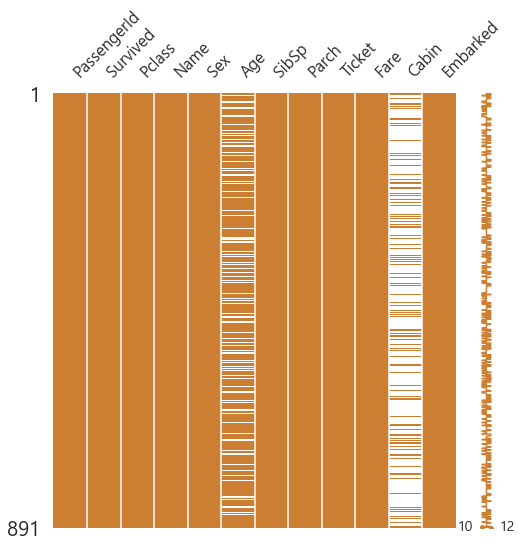

In [318]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

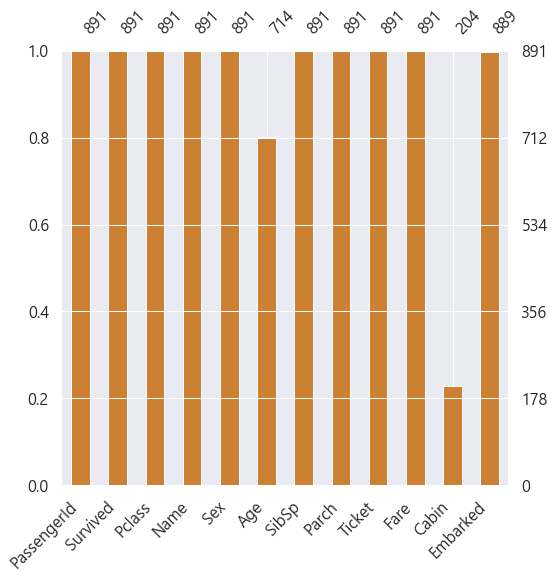

In [319]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 2.2 Target label 확인

1과 0의 분포 확인 : balanced data 인가 imbalanced data인가  
99%가 0인 train data 로 학습하면 학습이 편중되어 test data에서도 0이 많이 나오는 문제점이 생길 수 있다.

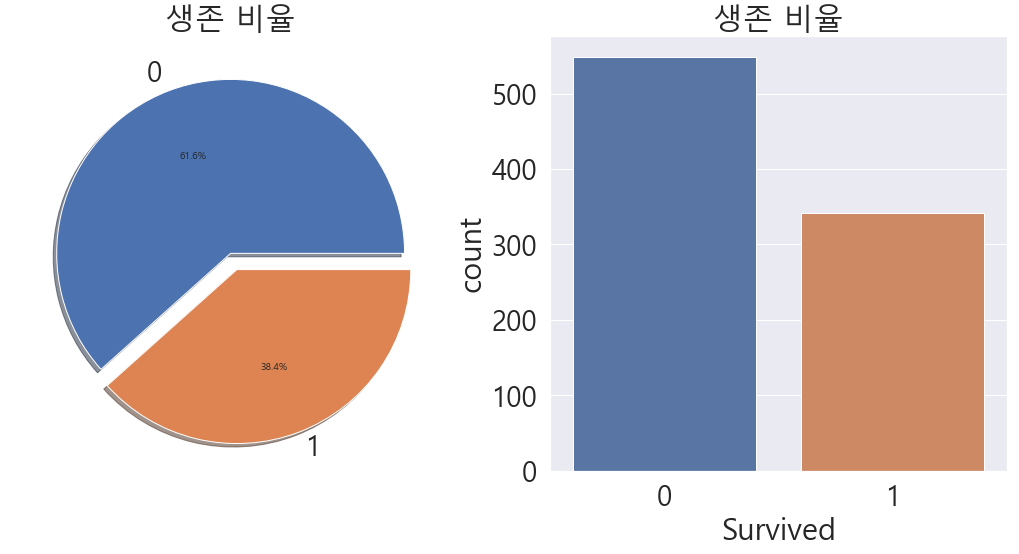

In [320]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# value_counts : 고유값의 개수 반환
# explode : 쪼개지는 반지름 길이 지정
# autopct 라벨 숫자 형식 지정
ax[0].set_title('생존 비율')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('생존 비율')

plt.show()

balance 함-> upsampling 이나 downsampling 기법 등을 사용해주지 않고 진행

## 3. Exploratory data analysis

feature 들간의 관계나 이상치 등 보기

## 3.1 Pclass : 티켓의 class

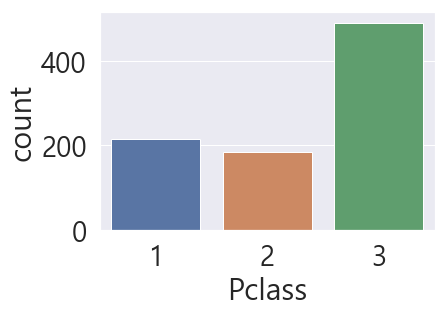

In [321]:
sns.countplot('Pclass', data=df_train)

### Pclass 마다 생존률에 차이가 있을까?

In [322]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# as_index : index 로 지정할 것인가

,Survived
Pclass,
1,216
2,184
3,491


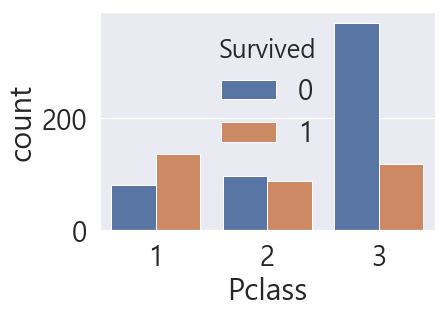

In [323]:
sns.countplot(data=df_train, x='Pclass', hue="Survived")
# hue : 이 변수로 색상 구분

In [324]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


클래스 별 생존률 ?

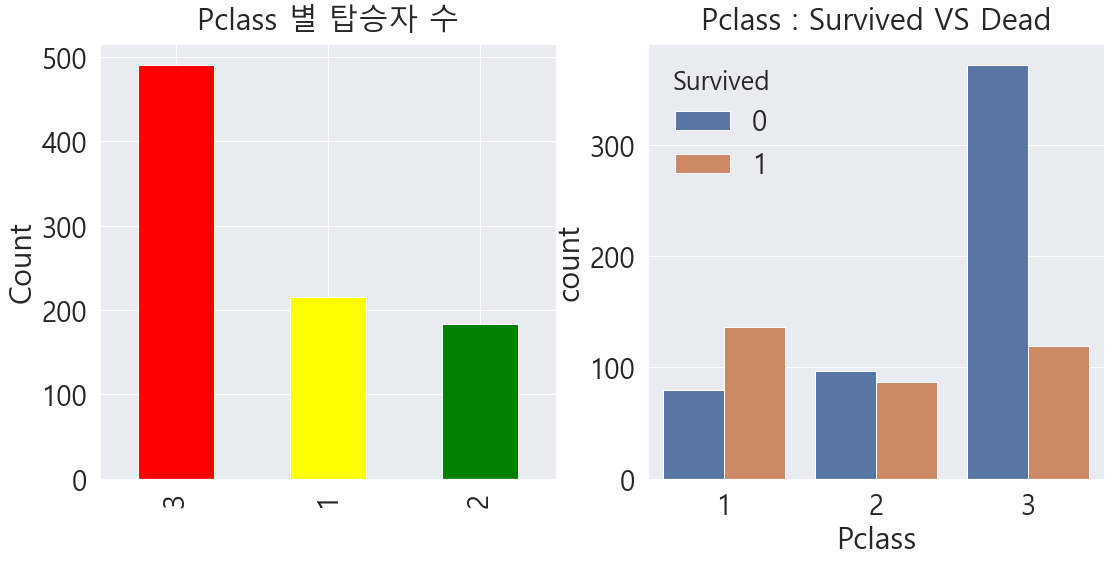

In [325]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=["red","yellow","green"], ax=ax[0])
ax[0].set_title('Pclass 별 탑승자 수', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived VS Dead', y=y_position)
plt.show()

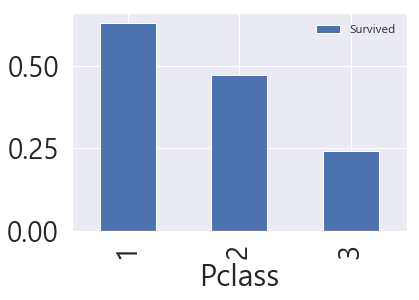

In [326]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()
plt.legend(fontsize='large')

Pclass 가 높을 수록 (class 1) 생존 확률이 높다. -> 생존 여부에 영향 o

## 3.2 Sex

### 성별에 따라 생존률이 다를까?

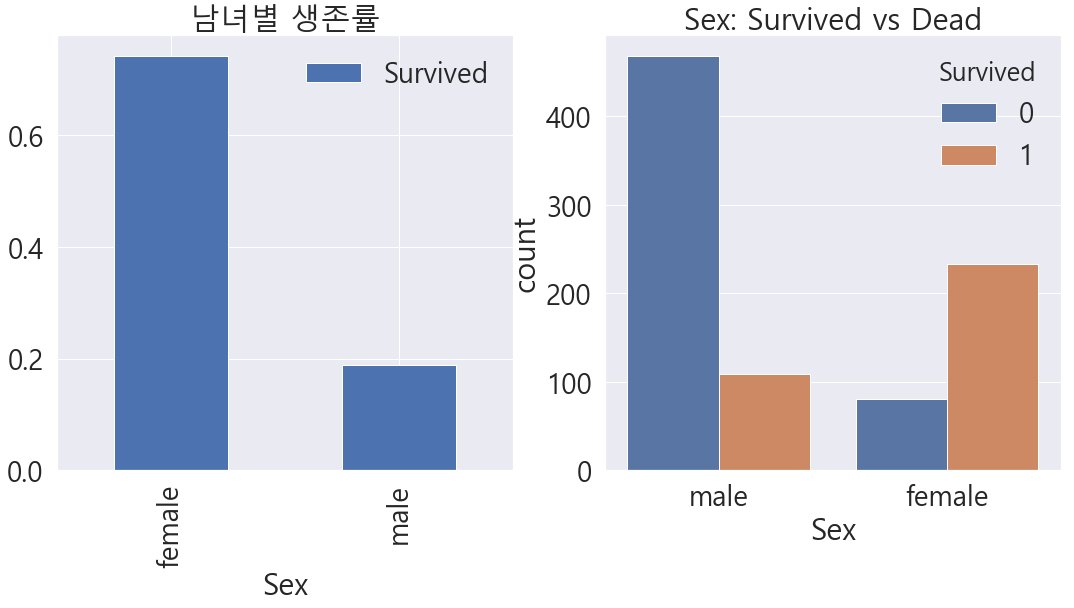

In [327]:
# 생존률
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('남녀별 생존률')

# 생존자, 사망자 수
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 생존률, 생존자 수가 훨씬 높다.

In [328]:
# 성별별 생존률 groupby
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [329]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 3.3 Both Sex and Pclass

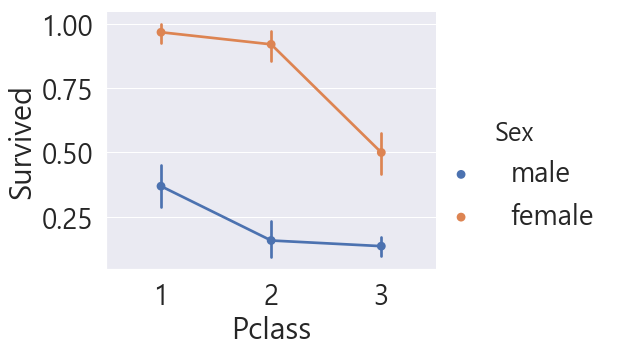

In [330]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=5, aspect=1.3) 

# aspect : 가로 세로 비율
# 3차원 그래프 그리기

- 여자가 남자보다 살 확률이 높음
- 클래스가 높을 수록 살 확률이 높음
- 어떤 class 와 관계 없이 여자가 살 확률이 가장 높음

## 3.4 Age

In [331]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


([], <a list of 0 Text xticklabel objects>)

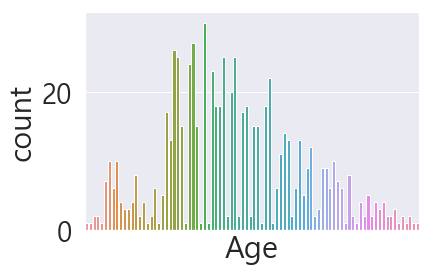

In [332]:
# 분포
sns.countplot('Age', data=df_train)
plt.xticks([], [])

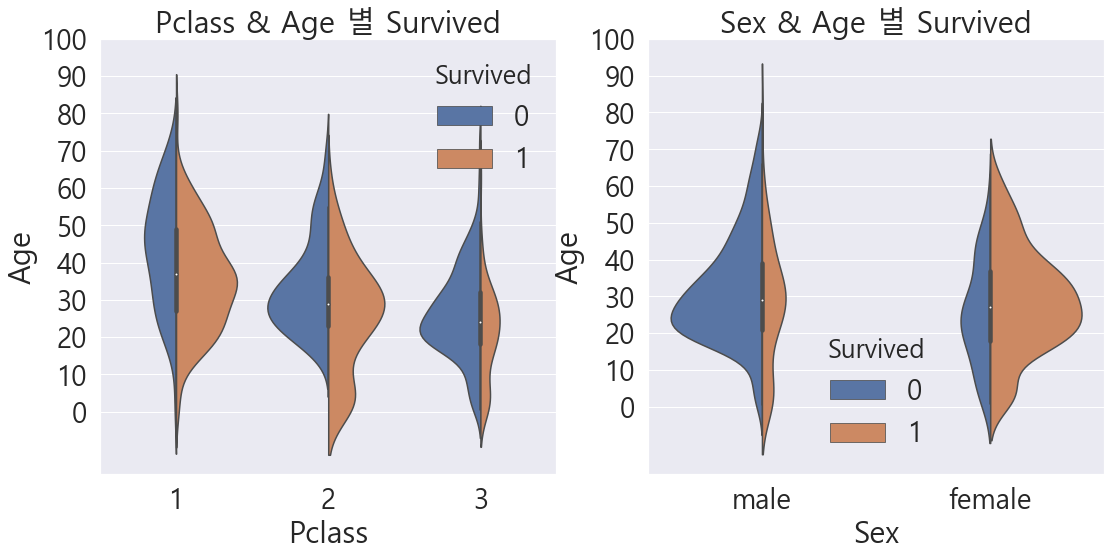

In [333]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass & Age 별 Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex & Age 별 Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [457]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [511]:
df_test['Age_cat_2'] = df_test['Age'].apply(category_age)

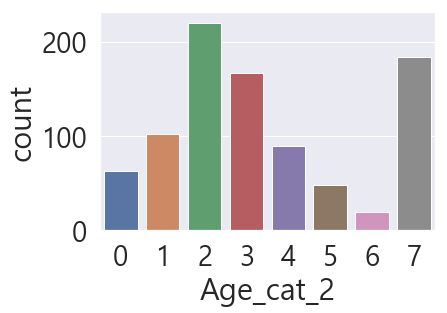

In [458]:
sns.countplot('Age_cat_2', data=df_train)

Text(0.5, 1.0, '나이 별 생존률')

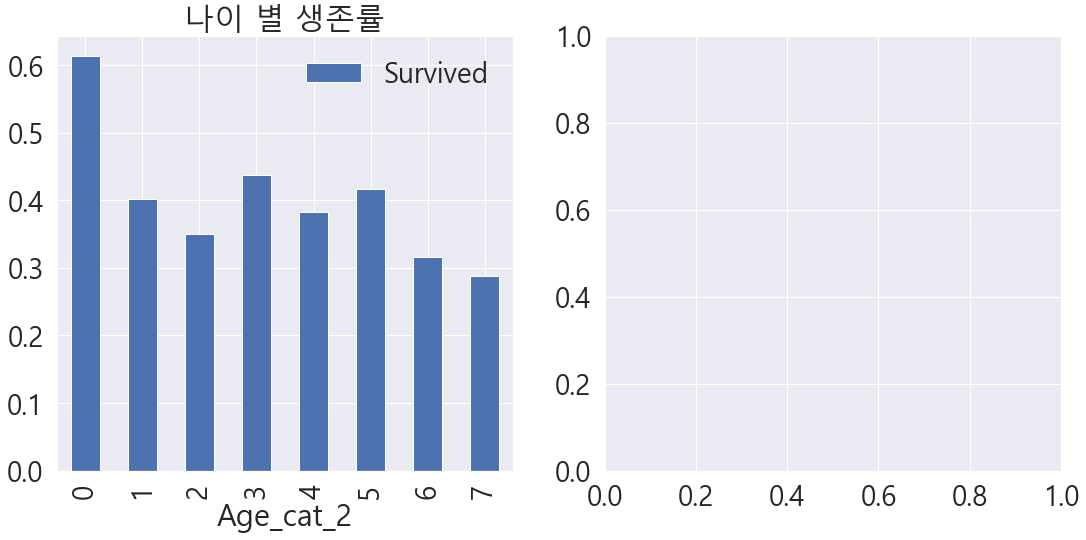

In [336]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Age_cat_2', 'Survived']].groupby(['Age_cat_2'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('나이 별 생존률')

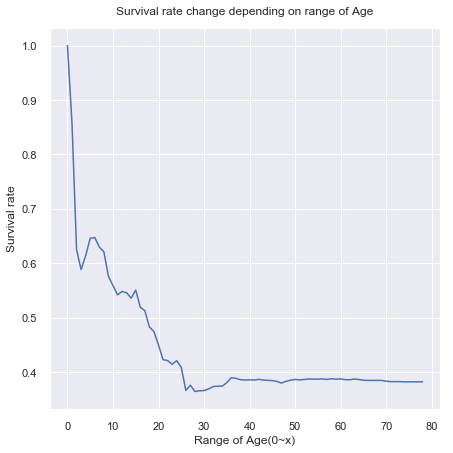

In [505]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 3.5 Embarked : 탑승 항구

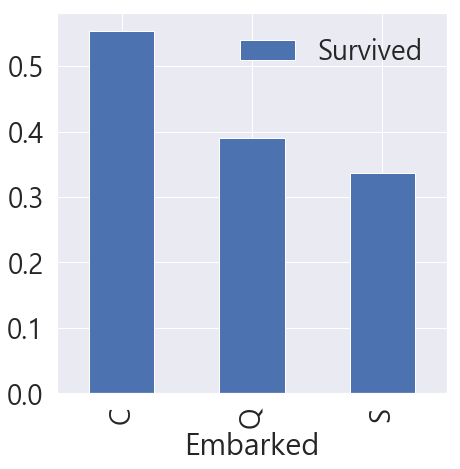

In [338]:
# 생존률
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

생존률 : C > Q > S

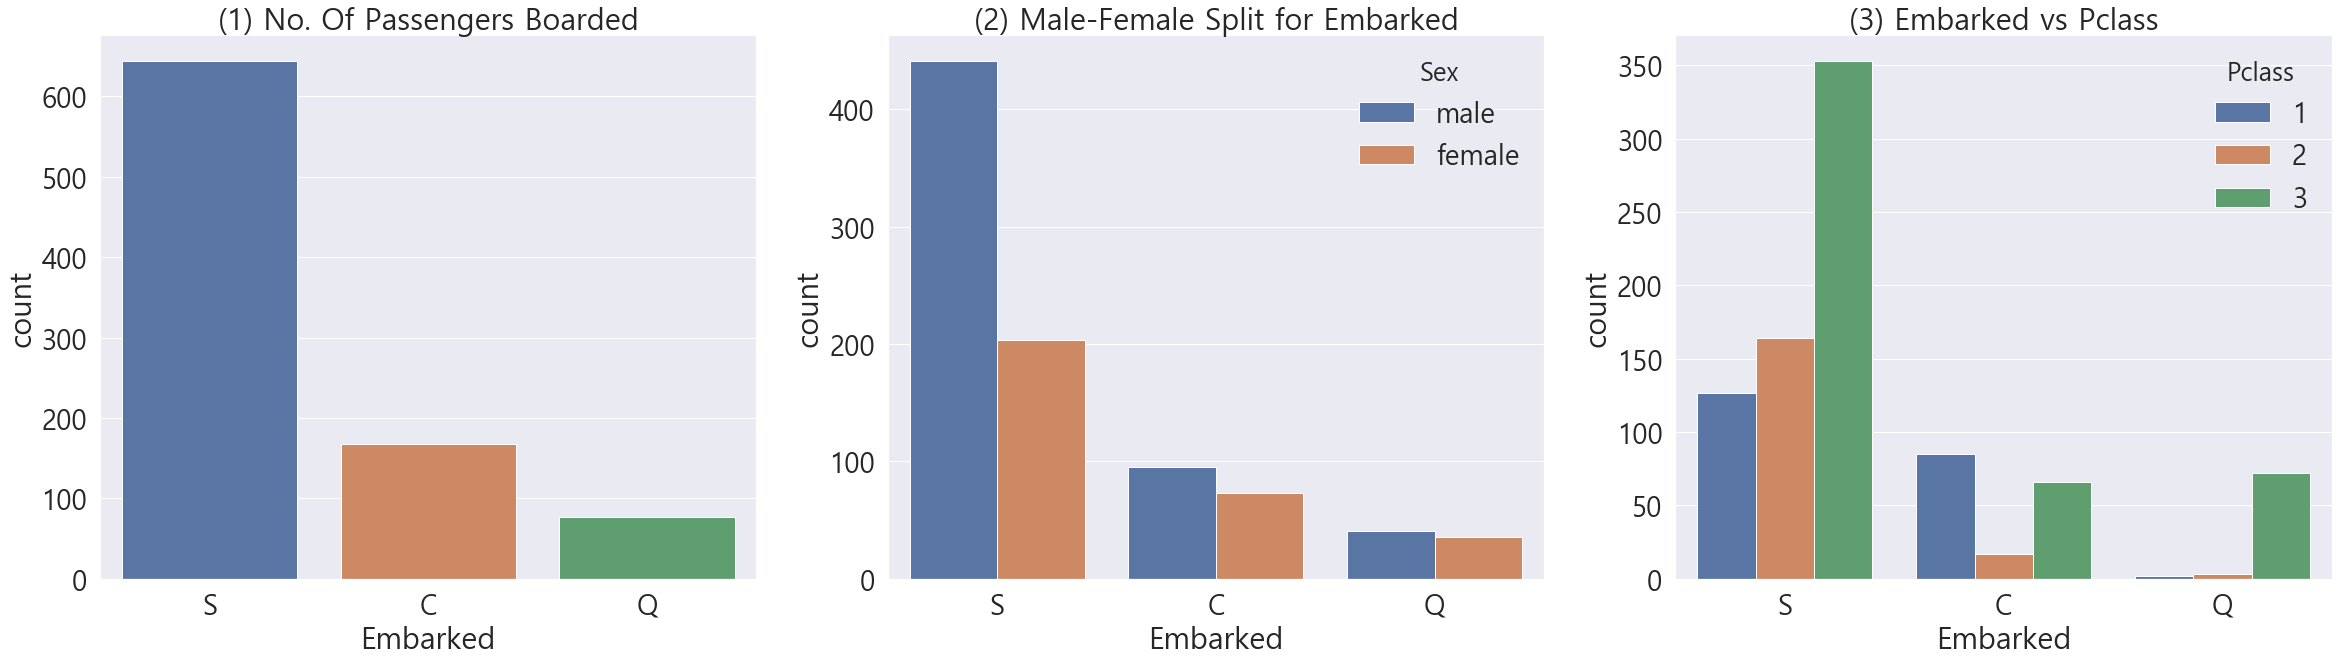

In [339]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('Embarked', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[1])
ax[1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[2])
ax[2].set_title('(3) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1) 생존률은 S 가 가장 낮은데 가장 많은 승객이 탐  

2) C,Q 의 남녀 비율은 비슷한데 S에서는 남자의 비율이 더 많음 -> 남녀 비율 때문에 항구 간의 차이가 나는 것도 있을 수 있겠다.  

3) S에 가장 많은 class3 승객이 탐 -> 승객의 클래스 때문에 항구 간의 차이가 있을 수 있겠다.

항구간의 생존률 차이는 그 지역(항구) 승객들의 클래스와 남녀 비율 때문이라서 '이 항구에서 타서 생존률이 낮다' 의 영향은 아니지 않을까?

## 3.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [459]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 
# 1은 본인

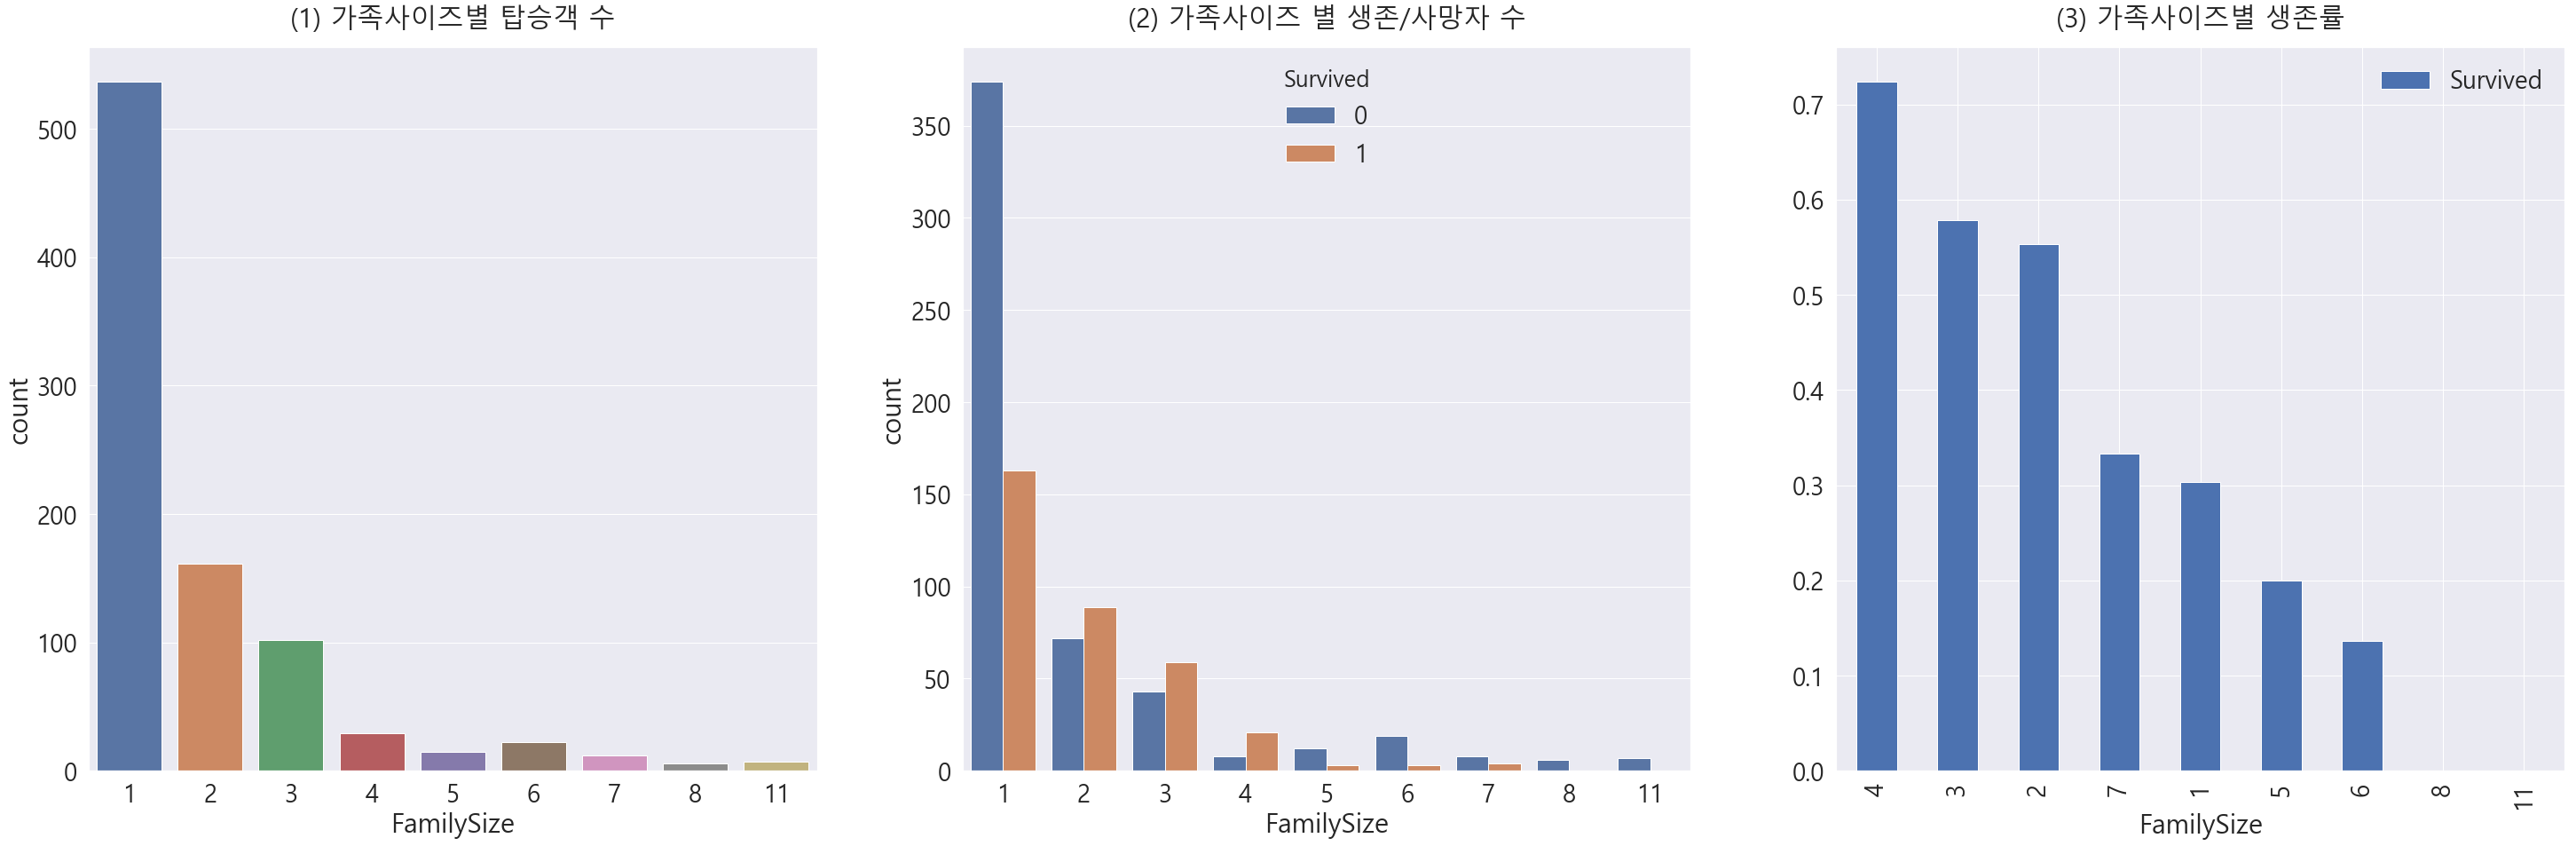

In [341]:
f,ax=plt.subplots(1, 3, figsize=(50,15))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) 가족사이즈별 탑승객 수', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) 가족사이즈 별 생존/사망자 수',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) 가족사이즈별 생존률',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1) 분포는 1~11, 대부분 단독가구
2) 가족크기와 생존자수 거의 비례, 2,3,4인 가족의 경우 생존자 수가 더 많다.
3) 가족크기와 생존률과 거의 비례

Fare(탑승요금)는 Pclass 와 비슷한 요소이고,   
Cabin(객실번호)은 NaN 값이 80%이며 객실 위치로 생존률을 고려하기에는 너무 많은 가능성이 있기 때문에 영향력이 낮다고 판단,  
Ticket(티켓번호) 또한 생존률과 무관한 요소로 고려하였다.

## 4. EDA

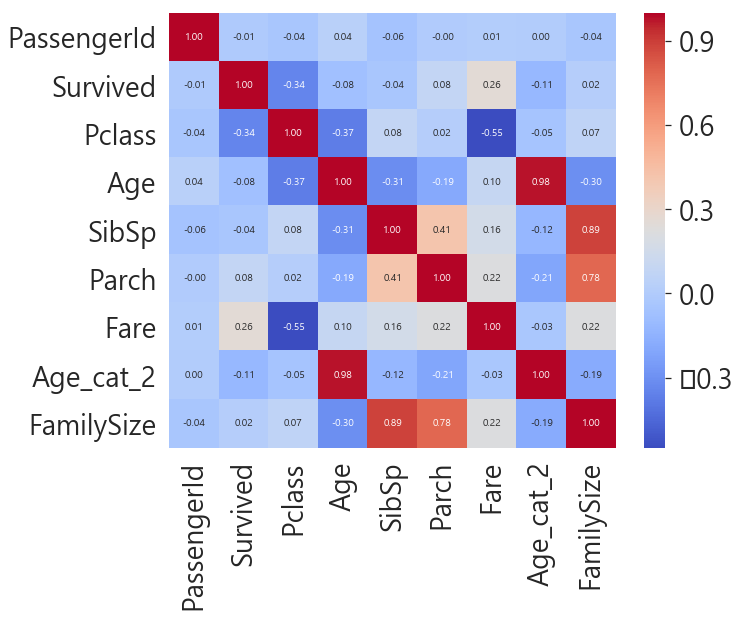

In [342]:
# 상관계수 히트맵
plt.rcParams['figure.figsize'] = [10, 8]
g = sns.heatmap(df_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Survived 와 상관관계가 높은 feature : Pclass, Age(Age_cat_2), Family (SibSP, Parch)    
서로 강한 상관관계를 가지는 feature : age, Age_cat_2 말고 없음

In [460]:
# Age 결측값 처리
## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(df_train["Age"][df_train["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df_train["Age"].median()
    age_pred = df_train["Age"][((df_train['SibSp'] == df_train.iloc[i]["SibSp"]) & (df_train['Parch'] == df_train.iloc[i]["Parch"]) & (df_train['Pclass'] == df_train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df_train['Age'].iloc[i] = age_pred
    else :
        df_train['Age'].iloc[i] = age_med

Pre-processing

In [465]:
index_NaN_age = list(df_test["Age"][df_test["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df_test["Age"].median()
    age_pred = df_test["Age"][((df_test['SibSp'] == df_test.iloc[i]["SibSp"]) & (df_test['Parch'] == df_test.iloc[i]["Parch"]) & (df_test['Pclass'] == df_test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df_test['Age'].iloc[i] = age_pred
    else :
        df_test['Age'].iloc[i] = age_med

In [462]:
df_train.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [463]:
df_test_copy = df_test.copy()
df_test.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [467]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Age_cat_2     0
FamilySize    0
dtype: int64

In [466]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
FamilySize    0
dtype: int64

In [468]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [433]:
print(df_train.shape, df_test.shape)

(889, 10) (418, 8)


In [469]:
df_train["Sex"] = df_train["Sex"].map({"male": 0, "female":1})
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female":1})

In [470]:
df_train["Embarked"] = df_train["Embarked"].map({"S": 0, "C":1, "Q":2})
df_test["Embarked"] = df_test["Embarked"].map({"S": 0, "C":1, "Q":2})

In [475]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_cat_2     0
FamilySize    0
dtype: int64

In [512]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Age_cat_2     0
dtype: int64

## 5. Predictive Modeling

In [351]:
#importing all the required ML packages

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV

### Split data for validation

In [476]:
y =df_train.Survived
X = df_train.drop('Survived', axis=1)

In [477]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=0)

In [478]:
print(X_train.shape, y_train.shape)

(622, 9) (622,)


In [479]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_cat_2     0
FamilySize    0
dtype: int64

## Logistic Regression

In [481]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [482]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_valid)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_valid))

The accuracy of the Logistic Regression is 0.7715355805243446


## Linear Support Vector Machine(linear-SVM)

In [483]:
# 초평면을 이용한
model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_valid)
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_valid))

The accuracy of the Linear Support Vector Machine is  0.7715355805243446


## Radial Support Vector Machines

In [484]:
model_rbf = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
model_rbf.fit(X_train, y_train)
prediction_rbf = model_rbf.predict(X_valid)
print('The accuracy of the Radical Support Vector Machine is ', metrics.accuracy_score(prediction_rbf, y_valid))

The accuracy of the Radical Support Vector Machine is  0.5880149812734082


## Decision Tree

In [485]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_valid)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_valid))

The accuracy of the Decision Tree is  0.7602996254681648


## K-Nearest Neighbours(KNN)

In [486]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_valid)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_valid))

The accuracy of the  K-Nearest Neighbours is  0.6853932584269663


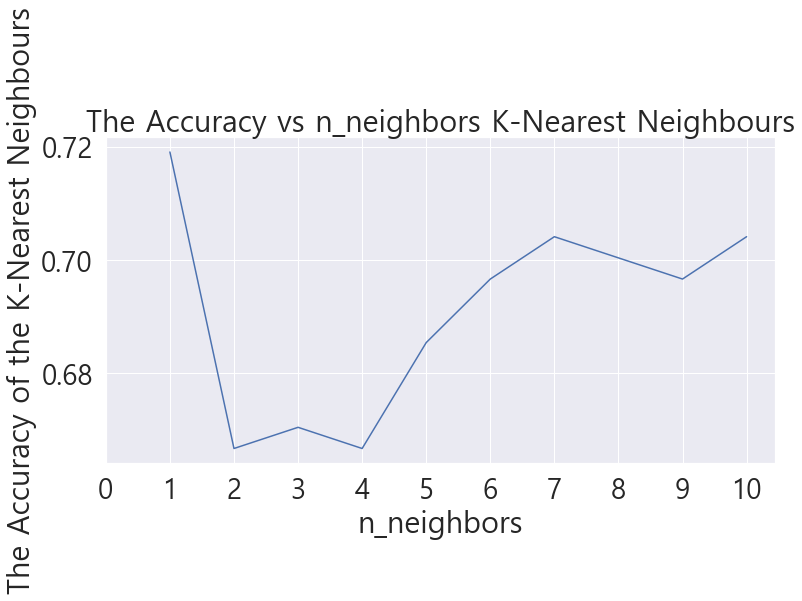

In [487]:
s =pd.Series()
for i in list(range(1,11)):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_valid)
    s = s.append(pd.Series(metrics.accuracy_score(prediction_knn, y_valid)))

plt.plot(list(range(1,11)), s)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.title('The Accuracy vs n_neighbors K-Nearest Neighbours')
plt.xlabel('n_neighbors')
plt.ylabel('The Accuracy of the K-Nearest Neighbours')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [488]:
# n 다시 설정

model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_valid)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_valid))

The accuracy of the  K-Nearest Neighbours is  0.6666666666666666


## Gaussian Naive Bayes

In [489]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_valid)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_valid))

The accuracy of the  Gaussian Naive Bayes is  0.7565543071161048


## Random Forests

In [490]:
list_n_estimators = [50,100,150,200,250,300,350,400,450,500]
random_acc = pd.Series()
for i in list_n_estimators:
    model_random = RandomForestClassifier(n_estimators=i)
    model_random.fit(X_train, y_train)
    predict_random = model_random.predict(X_valid)
    random_acc =random_acc.append(pd.Series(metrics.accuracy_score(predict_random, y_valid)))
#print(random_acc)

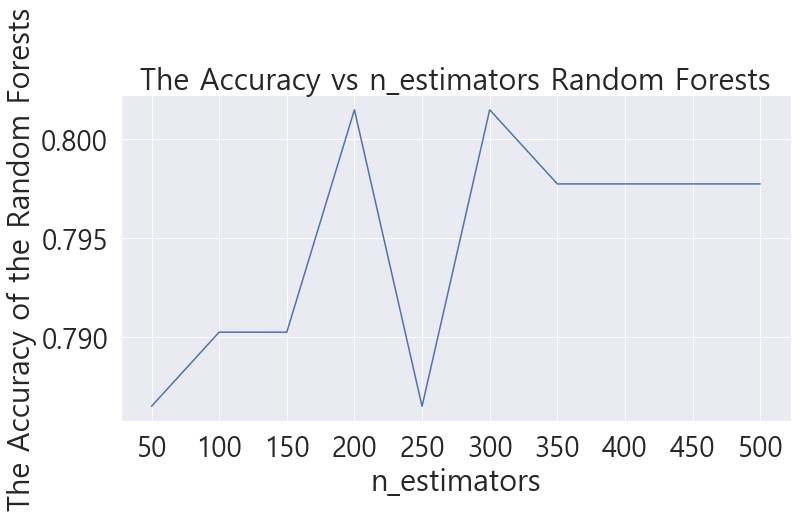

In [491]:
plt.plot(list_n_estimators, random_acc)
plt.xticks(list_n_estimators)
plt.title('The Accuracy vs n_estimators Random Forests')
plt.xlabel('n_estimators')
plt.ylabel('The Accuracy of the Random Forests')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [492]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_valid)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_valid))

The accuracy of the  Random Forest is  0.7940074906367042


In [493]:
import sklearn

## Cross Validation

In [494]:
#load nesseray libraries
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier


kfold =KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes' , 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

    
    
    
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv=kfold,scoring='accuracy')
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_data_frame = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_data_frame

,CV Mean,Std
Linear Svm,0.786249,0.039407
Radial Svm,0.708746,0.050992
Logistic Regression,0.791918,0.027967
KNN,0.718846,0.045192
Decision Tree,0.767199,0.038712
Naive Bayes,0.786300,0.021099
Random Forest,0.813317,0.031251


Text(0.5, 1.0, 'accuracy')

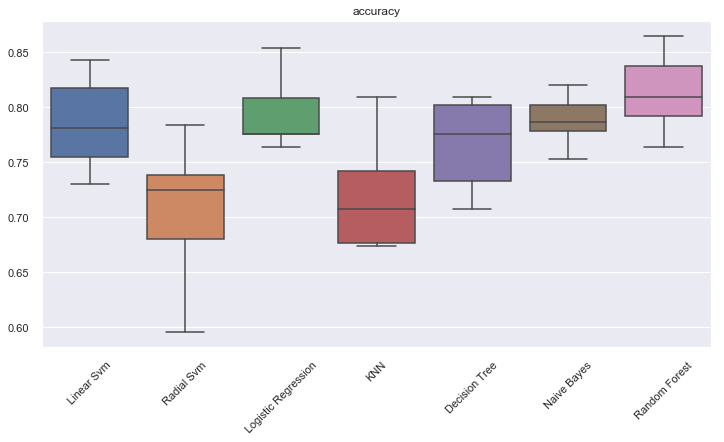

In [495]:
sns.set(font_scale = 1)

plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(new_models_data_frame.index, accuracy)
plt.title("accuracy")

SVM 과 Random Forest 에서 가장 정확도가 높다

In [496]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_valid)

In [497]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_valid.shape[0], 100 * metrics.accuracy_score(prediction, y_valid)))

총 267명 중 79.03% 정확도로 생존을 맞춤


## Hyper-Parameter Tuning

### SVM

In [498]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X,y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 260 candidates, totalling 780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed: 14.1min finished


0.7874015748031497
SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## 6. Feature importance

In [499]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_valid.columns)

In [500]:
feature_importance

array([0.09641302, 0.24724684, 0.19090155, 0.02797226, 0.02056913,
       0.22594344, 0.04755564, 0.08440976, 0.05898836])

In [501]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [502]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize'],
      dtype='object')

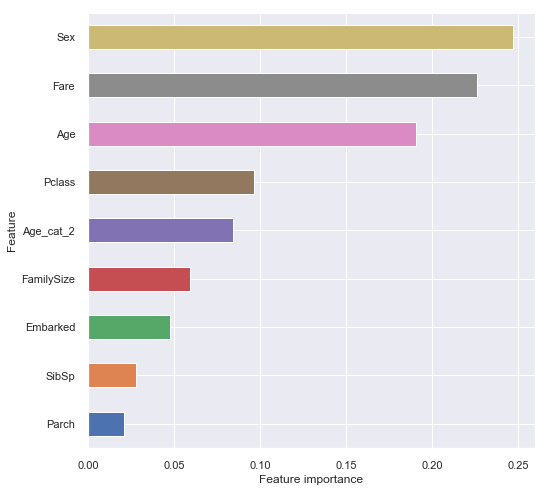

In [503]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

randomforest에서의 중요도 : Sex, Fare, Age, Pclass, ...

## 7. Prediction on Test set & Submit

In [513]:
prediction = model.predict(df_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,